## Part 9 - Random Forest

In [373]:
import pip 
pip.main(["install","matplotlib"]) 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


0

In [374]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\python39\lib\site-packages (1.1.2)


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [375]:
!pip install xgboost
from xgboost import XGBRegressor

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [376]:
# Chargement des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [377]:
# Chargement de la dataset
## Choix de 4 datasets, ne pas oublier de choisir la features_list adéquate

#dataset = pd.read_csv("dataset_CV_labelise_features1_100.csv", delimiter = ";", encoding = "utf-8") ## 100CV + 4 features numériques

#dataset = pd.read_csv("dataset_CV_labelise_features1_200.csv", delimiter = ";", encoding = "utf-8") ## 200CV + 4 features numériques

#dataset = pd.read_csv("dataset_CV_labelise_features2_100.csv", delimiter = ";", encoding = "utf-8") ## 100CV + 12 features numériques

dataset = pd.read_csv("dataset_CV_labelise_features2_200.csv", delimiter = ";", encoding = "utf-8") ## 200CV + 12 features numériques

In [378]:
dataset.shape

(5594, 19)

In [379]:
data_desc = dataset.describe(include='all')
display(data_desc)

,CV_Sentences,Sentences_CV_clean,CV_Number,Sentence_line,Nb_tokens,%texte_lu,%texte_lu_fin_ligne,Is_alpha,Grammar,Tokenization,Verb_count,Propn_count,Noun_count,Num_count,Pourcentage_verb_sentence,Pourcentage_propn_sentence,Pourcentage_noun_sentence,Pourcentage_num_sentence,Label
count,5594,5592,5594,5594.000000,5594.000000,5594.000000,5594.000000,5594,5594,5592,5594.000000,5594.000000,5594.00000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000
unique,3805,3802,200,NaN,NaN,NaN,NaN,1626,2748,3802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,,,CV_10,NaN,NaN,NaN,NaN,[False],['NOUN'],,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,198,198,66,NaN,NaN,NaN,NaN,638,334,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,15.673221,9.132285,50.470518,49.529483,NaN,NaN,NaN,0.297283,0.611012,2.83822,0.320164,0.020117,0.105039,0.314979,0.042982,0.037898
std,NaN,NaN,NaN,11.268076,10.914849,30.190027,30.190025,NaN,NaN,NaN,0.784780,1.129198,3.56600,0.693458,0.059959,0.227969,0.251108,0.131906,0.190966
min,NaN,NaN,NaN,0.000000,1.000000,0.240000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,7.000000,2.000000,24.190000,23.552500,NaN,NaN,NaN,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000
50%,NaN,NaN,NaN,14.000000,5.000000,49.530000,50.470000,NaN,NaN,NaN,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.307692,0.000000,0.000000
75%,NaN,NaN,NaN,23.000000,12.000000,76.447500,75.810000,NaN,NaN,NaN,0.000000,1.000000,4.00000,0.000000,0.000000,0.102564,0.416667,0.000000,0.000000


In [380]:
display(100*dataset.isnull().sum()/dataset.shape[0])

CV_Sentences                  0.000000
Sentences_CV_clean            0.035753
CV_Number                     0.000000
Sentence_line                 0.000000
Nb_tokens                     0.000000
%texte_lu                     0.000000
%texte_lu_fin_ligne           0.000000
Is_alpha                      0.000000
Grammar                       0.000000
Tokenization                  0.035753
Verb_count                    0.000000
Propn_count                   0.000000
Noun_count                    0.000000
Num_count                     0.000000
Pourcentage_verb_sentence     0.000000
Pourcentage_propn_sentence    0.000000
Pourcentage_noun_sentence     0.000000
Pourcentage_num_sentence      0.000000
Label                         0.000000
dtype: float64

Préprocessing

In [381]:
# Vérifier des valeurs de la colonne label
dataset["Label"].unique()

array([1, 0], dtype=int64)

In [382]:
# Suppression des lignes de CV_Sentences avec les '#NOM?'
dataset = dataset.loc[(dataset['CV_Sentences'] != "#NOM?"),:]
dataset.shape

(5416, 19)

In [383]:
# Suppression des lignes de CV_Sentences avec ':'
dataset = dataset.loc[(dataset['CV_Sentences'] != ":"),:]
dataset.shape

(5412, 19)

In [384]:
# Suppresion des lignes sans valeur (avec NaN)
dataset = dataset.dropna(axis =0, how = 'any')
dataset.shape

(5410, 19)

In [385]:
# Vérification de la présence des valeurs 'Null' dans la dataset
display(100*dataset.isnull().sum()/dataset.shape[0])

CV_Sentences                  0.0
Sentences_CV_clean            0.0
CV_Number                     0.0
Sentence_line                 0.0
Nb_tokens                     0.0
%texte_lu                     0.0
%texte_lu_fin_ligne           0.0
Is_alpha                      0.0
Grammar                       0.0
Tokenization                  0.0
Verb_count                    0.0
Propn_count                   0.0
Noun_count                    0.0
Num_count                     0.0
Pourcentage_verb_sentence     0.0
Pourcentage_propn_sentence    0.0
Pourcentage_noun_sentence     0.0
Pourcentage_num_sentence      0.0
Label                         0.0
dtype: float64

Application du modèle Random Forest

In [386]:
# Separate target variable Y from features X
print("Separating labels from features...")

## Choisir la features_list par rapport au dataset
#features_list = ["CV_Sentences","Sentences_CV_clean","CV_Number", "Is_alpha", "Grammar", "Label"] ## Pour les datasets features1
features_list = ["CV_Sentences","Sentences_CV_clean","CV_Number", "Is_alpha", "Label", "Grammar", "Tokenization"] ## Pour les datasets features2
target_variable = "Label"

X = dataset.drop(features_list, axis = 1)
y = dataset.loc[:,target_variable]

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
y : 
0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

X :
   Sentence_line  Nb_tokens  %texte_lu  %texte_lu_fin_ligne  Verb_count  \
0              0          6       2.80                97.20           1   
1              1          1       3.27                96.73           0   
2              2          8       7.01                92.99           0   
3              3         24      18.22                81.78           5   
4              4          1      18.69                81.31           0   

   Propn_count  Noun_count  Num_count  Pourcentage_verb_sentence  \
0            3           1          1                   0.166667   
1            0           1          0                   0.000000   
2            1           2          0                   0.000000   
3            1           5          1                   0.208333   
4            0           1          0                   0.000000   

   Pourcentage_propn_sentence  Pou

In [387]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Sentence_line', 'Nb_tokens', '%texte_lu', '%texte_lu_fin_ligne', 'Verb_count', 'Propn_count', 'Noun_count', 'Num_count', 'Pourcentage_verb_sentence', 'Pourcentage_propn_sentence', 'Pourcentage_noun_sentence', 'Pourcentage_num_sentence']
Found categorical features  []


In [388]:
# Divide dataset Train set & Test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [389]:
# Create pipeline for numeric features
numeric_transformer = SimpleImputer(strategy='mean')

In [390]:
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')

In [391]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Grid Search

In [393]:
# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best validation accuracy :  0.9743533675572511


In [394]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [395]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [396]:
# Print scores
print("accuracy on training set : ", accuracy_score(y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(y_test, Y_test_pred))                              
print()

accuracy on training set :  0.9831330868761553
accuracy on test set :  0.9704251386321626

f1-score on training set :  0.7420494699646644
f1-score on test set :  0.5



Matrice de Confusion

In [397]:
# Visualize confusion matrices
from plotly.subplots import make_subplots
cm_train = confusion_matrix(y_train, Y_train_pred)
cm_test = confusion_matrix(y_test, Y_test_pred)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("train", "test"), 
                    x_title = 'Prediction', y_title = 'True label')
fig.update_layout(
        title = go.layout.Title(text = "Confusion matrices", x = 0.5))
fig.update_yaxes(autorange='reversed')
fig.add_trace(
    go.Heatmap(
        name = 'train',
        x = ['0', '1'], 
        y = ['0', '1'], 
        z = cm_train,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 1
)  
fig.add_trace(
    go.Heatmap(
        name = 'test',
        x = ['0', '1'], 
        y = ['0', '1'], 
        z = cm_test,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 2
)

ROC Curves

In [398]:
# Visualize ROC curves
probas_train = gridsearch.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = roc_curve(y_train, probas_train)
fig = go.Figure(
    data = go.Scatter(
        name = 'train',
        x = recalls, 
        y = precisions, 
        mode = 'lines'
    ),
    layout = go.Layout(
        title = go.layout.Title(text = "ROC curve", x = 0.5),
        xaxis = go.layout.XAxis(title = 'False Positive Rate'),
        yaxis = go.layout.YAxis(title = 'True Positive Rate')
    )
)

probas_test = gridsearch.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(y_test, probas_test)
fig.add_trace(go.Scatter(
    name = 'test',
    x = recalls, 
    y = precisions, 
    mode = 'lines'
    )
)
fig.show()

Comparer différents Algorithmes

In [399]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [400]:
classifiers = []
tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
nb = GaussianNB()
logreg = LogisticRegression()

classifiers.append(tree)
classifiers.append(knn)
classifiers.append(nb)
classifiers.append(logreg)

In [401]:
from sklearn.model_selection import cross_val_score

cv_results = []
for classifier in classifiers:
  cv_results.append(cross_val_score(classifier, X_train, y_train, cv=10 ,scoring="accuracy"))

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444:

In [402]:
cv_results

[array([0.97228637, 0.97690531, 0.97228637, 0.97228637, 0.96073903,
        0.96766744, 0.97228637, 0.97228637, 0.97222222, 0.97685185]),
 array([0.96997691, 0.96766744, 0.96535797, 0.96997691, 0.9630485 ,
        0.9630485 , 0.96766744, 0.96997691, 0.96990741, 0.96759259]),
 array([0.91224018, 0.93533487, 0.91685912, 0.90300231, 0.88452656,
        0.86143187, 0.89376443, 0.89145497, 0.90740741, 0.90509259]),
 array([0.96766744, 0.9630485 , 0.97228637, 0.9630485 , 0.95612009,
        0.96535797, 0.97459584, 0.96766744, 0.97222222, 0.96990741])]

In [403]:
results = pd.DataFrame({"Algorithm": ["tree", "knn", "nb", "logreg"],
             "Accuracy_mean": [cv_result.mean() for cv_result in cv_results],
             "Std": [cv_result.std() for cv_result in cv_results]})

results = results.sort_values(by="Accuracy_mean", ascending=False)
results

,Algorithm,Accuracy_mean,Std
0,tree,0.971582,0.004381
1,knn,0.967422,0.002616
3,logreg,0.967192,0.005236
2,nb,0.901111,0.018971


In [404]:
tree = DecisionTreeClassifier() 
tree_param_grid = {"max_depth" : np.arange(1,10,1)}

gsTree = GridSearchCV(tree,tree_param_grid, cv=10, scoring="accuracy", verbose = 1)

gsTree.fit(X_train,np.ravel(y_train))

tree_best = gsTree.best_estimator_

# Best score
print("best {0} score on the train set : \n {1} \n best {0} score on the test set : \n {2}".format("Tree", tree_best.score(X_train,y_train), tree_best.score(X_test,y_test)))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best Tree score on the train set : 
 0.975739371534196 
 best Tree score on the test set : 
 0.9685767097966729


In [405]:
tree = RandomForestClassifier() 
tree_param_grid = {"max_depth" : np.arange(1,20,1)}

gsTree = GridSearchCV(tree,tree_param_grid, cv=10, scoring="accuracy", verbose = 1)

gsTree.fit(X_train,np.ravel(y_train))

tree_best = gsTree.best_estimator_

# Best score
print("best {0} score on the train set : \n {1} \n best {0} score on the test set : \n {2}".format("Tree", tree_best.score(X_train,y_train), tree_best.score(X_test,y_test)))

Fitting 10 folds for each of 19 candidates, totalling 190 fits
best Tree score on the train set : 
 0.9932994454713494 
 best Tree score on the test set : 
 0.9685767097966729


In [406]:
knn = KNeighborsClassifier()
knn_param_grid = {"n_neighbors": np.arange(1,10,1)}

gsknn = GridSearchCV(knn,knn_param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)
gsknn.fit(X_train, y_train)

gsknn_best = gsknn.best_estimator_
print("best {0} score on the train set : \n {1} \n best {0} score on the test set : \n {2}".format("Knn", gsknn_best.score(X_train,y_train), gsknn_best.score(X_test,y_test)))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best Knn score on the train set : 
 0.9715804066543438 
 best Knn score on the test set : 
 0.9685767097966729


In [407]:
Log = LogisticRegression()
log_param_grid = {"class_weight": [None, "balanced"],
                 "C": [0.5, 0.6,0.7,0.8,0.9,1.0]}
gsLog = GridSearchCV(Log, log_param_grid, cv =10, scoring ='accuracy', n_jobs=-1, verbose=1)
gsLog.fit(X_train, y_train)
gsLog_best = gsLog.best_estimator_

print("best {0} score on the train set : \n {1} \n best {0} score on the test set : \n {2}".format("Logistic regression", gsLog_best.score(X_train,y_train), gsLog_best.score(X_test,y_test)))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
best Logistic regression score on the train set : 
 0.967652495378928 
 best Logistic regression score on the test set : 
 0.9658040665434381


c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [408]:
# no grid search needed on naive bayes
Naive_Bayes = GaussianNB()
gsNaive_Bayes_best = Naive_Bayes 

In [409]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[("tree", tree_best),("knn",gsknn_best),("LogisticRegression",gsLog_best),("Naive Bayes",gsNaive_Bayes_best)], 
                           voting='soft')

votingC = votingC.fit(X_train,y_train)


c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [410]:
print(" {0} score on the train set : \n {1} \n best {0} score on the test set : \n {2}".format("Voting Classifier", votingC.score(X_train,y_train), votingC.score(X_test,y_test)))


 Voting Classifier score on the train set : 
 0.9771256931608133 
 best Voting Classifier score on the test set : 
 0.9713493530499075


In [411]:
Xvalscore = cross_val_score(votingC, X_train, y_train, scoring = "accuracy", cv = 10, n_jobs=4)
print("the average score is : {0} \n the standard deviation of the score is : {1} \n the list of score : {2}".format(Xvalscore.mean(), Xvalscore.std(), Xvalscore))

the average score is : 0.9725039560345564 
 the standard deviation of the score is : 0.003649625858810165 
 the list of score : [0.97459584 0.97459584 0.97690531 0.97228637 0.96535797 0.96766744
 0.97690531 0.97459584 0.97222222 0.96990741]


Feature Importance

In [418]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [419]:
X, y = make_classification(
    n_samples=1000,
    n_features=12,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [420]:
from sklearn.ensemble import RandomForestClassifier

feature_names = list_columns.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [421]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


In [422]:
list_columns = dataset.drop(features_list, axis = 1)
list_columns.columns

Index(['Sentence_line', 'Nb_tokens', '%texte_lu', '%texte_lu_fin_ligne',
       'Verb_count', 'Propn_count', 'Noun_count', 'Num_count',
       'Pourcentage_verb_sentence', 'Pourcentage_propn_sentence',
       'Pourcentage_noun_sentence', 'Pourcentage_num_sentence'],
      dtype='object')

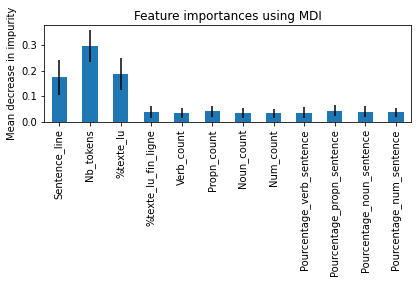

In [423]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

XGBoost

In [424]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [425]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [426]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [427]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%


In [428]:
print("f1-score on test set : ", f1_score(y_test, predictions))
print()

f1-score on test set :  0.9236641221374046



Fin part 12